In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import configparser
import math

In [33]:
config = configparser.ConfigParser()
config.read('../build/src/advection.ini')


nIter = int(config['run']['maxIter'])
dt    = float(config['discretization']['dt'])
dVx   = float(config['discretization']['dVx'])
minX  = float(config['discretization']['minRealx'])
maxX  = float(config['discretization']['maxRealx'])
minVx = float(config['discretization']['minRealVx'])

df = pd.read_csv("../build/src/solution.log", sep=",", header=None)

dx = (maxX - minX) / len(df.columns)

print(f"\
nIter : {nIter}\n\
dt    : {dt}\n\
dx    : {dx}\n\
dVx   : {dVx}\n\
minX  : {minX}\n\
maxX  : {maxX}\n\
minVx : {minVx}")

# df

nIter : 1000
dt    : 0.001
dx    : 0.0009765625
dVx   : 0.25
minX  : 0.0
maxX  : 1.0
minVx : 0.0


# Plot exact solution on top of numerical approx

Vx[0] = 0.0


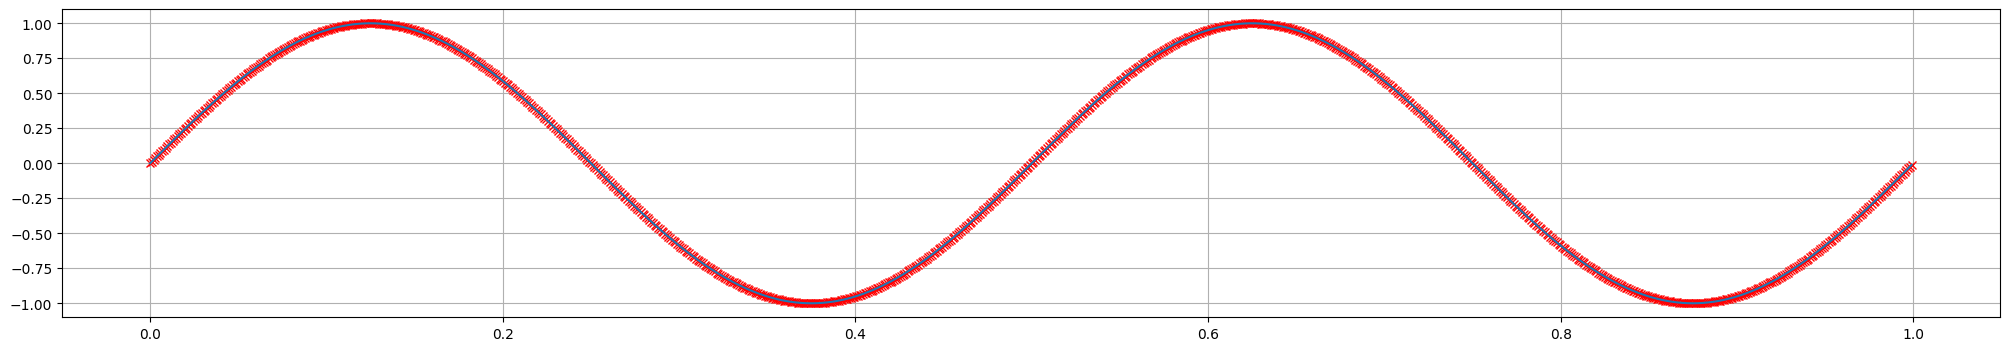

Vx[1] = 0.25


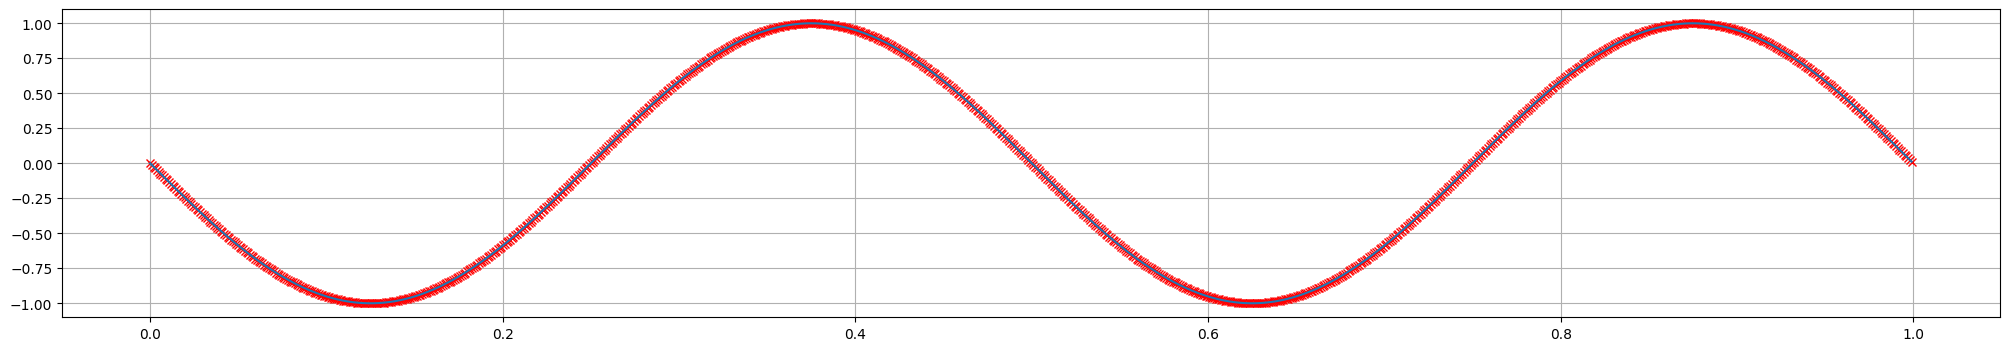

Vx[2] = 0.5


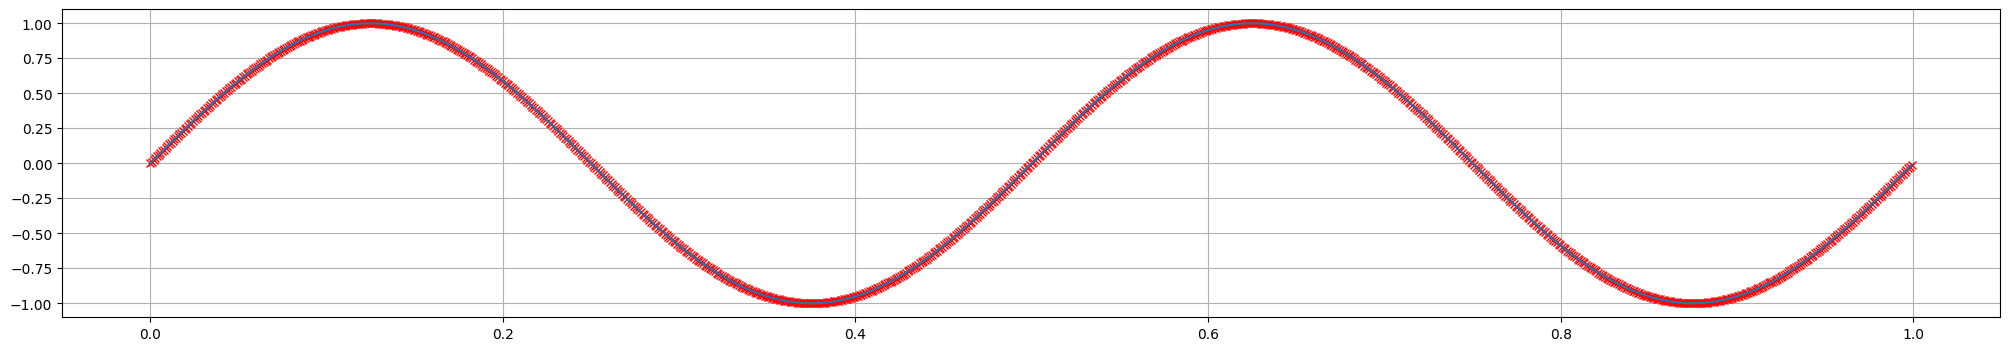

Vx[3] = 0.75


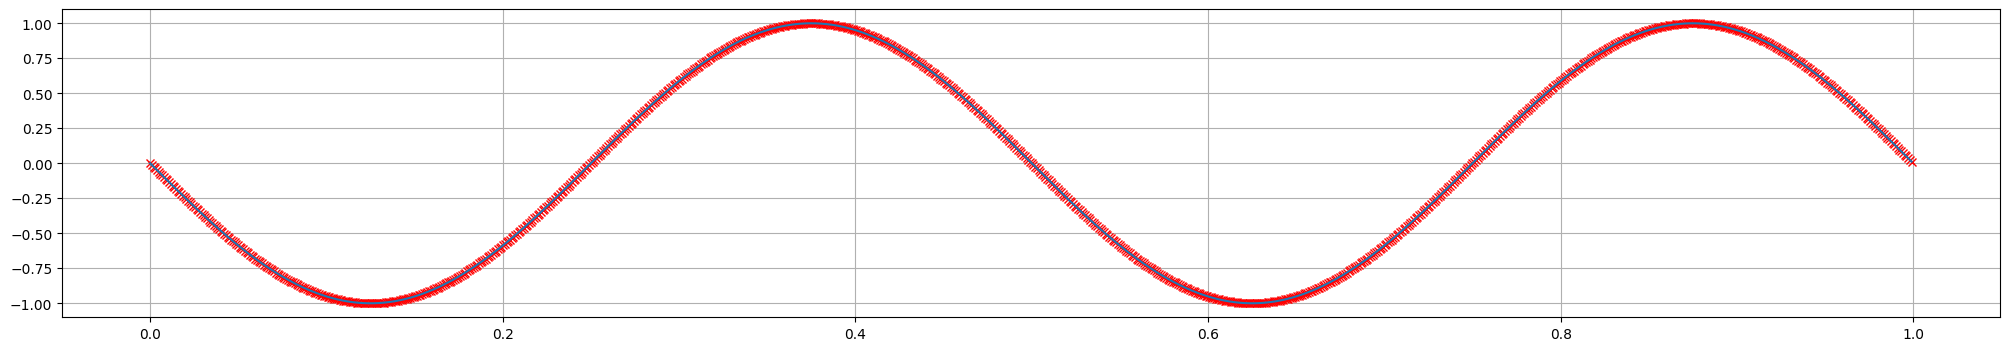

Vx[4] = 1.0


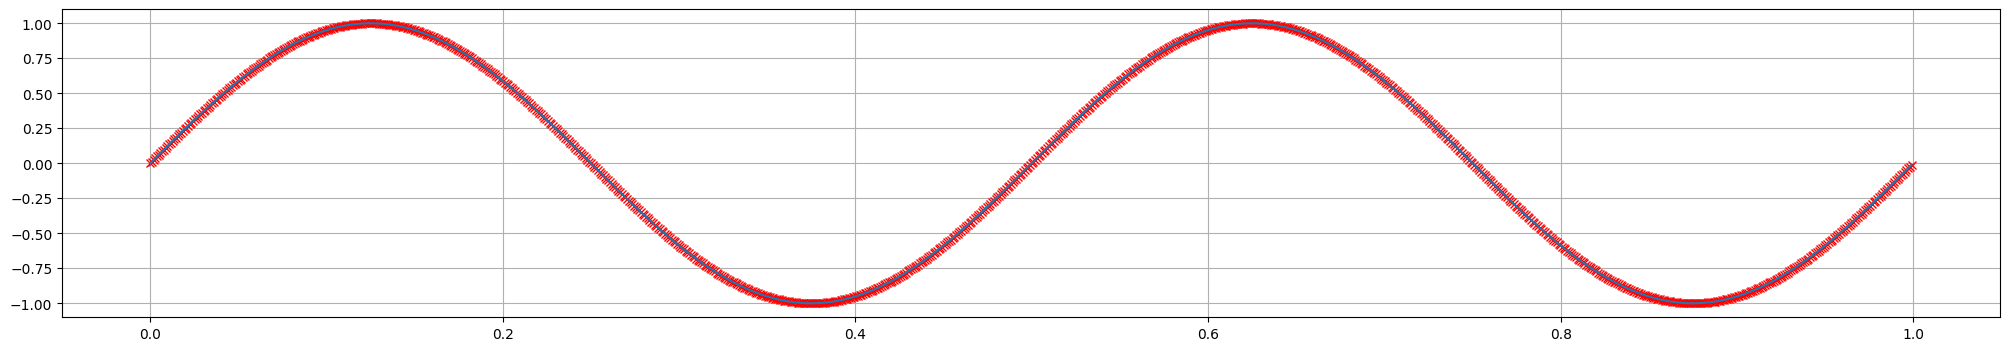

Vx[5] = 1.25


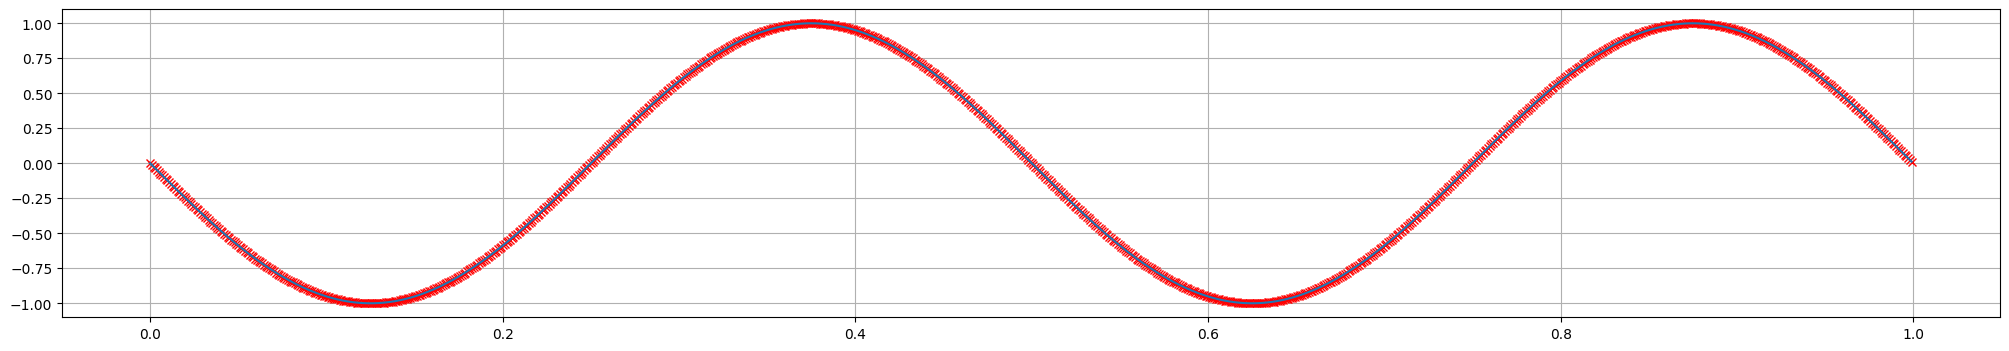

Vx[6] = 1.5


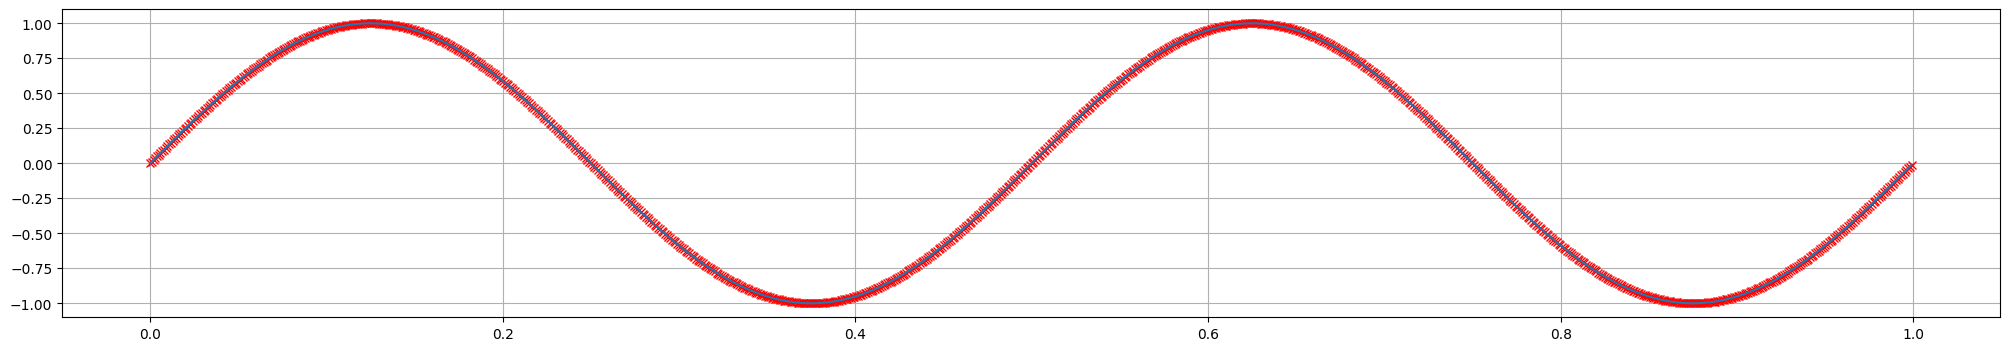

Vx[7] = 1.75


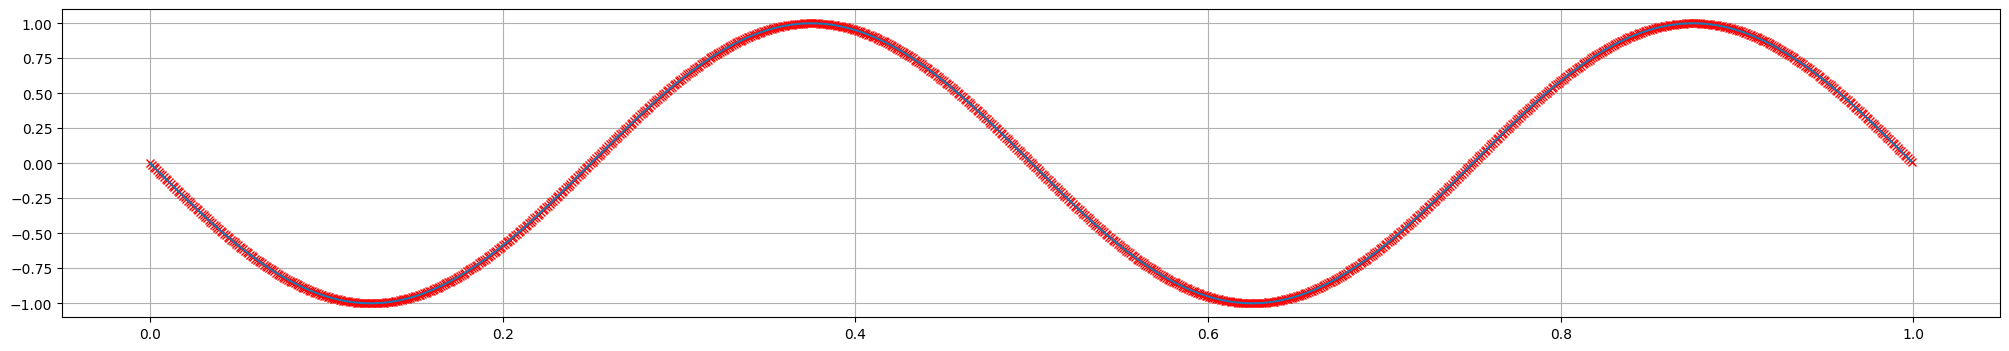

Vx[8] = 2.0


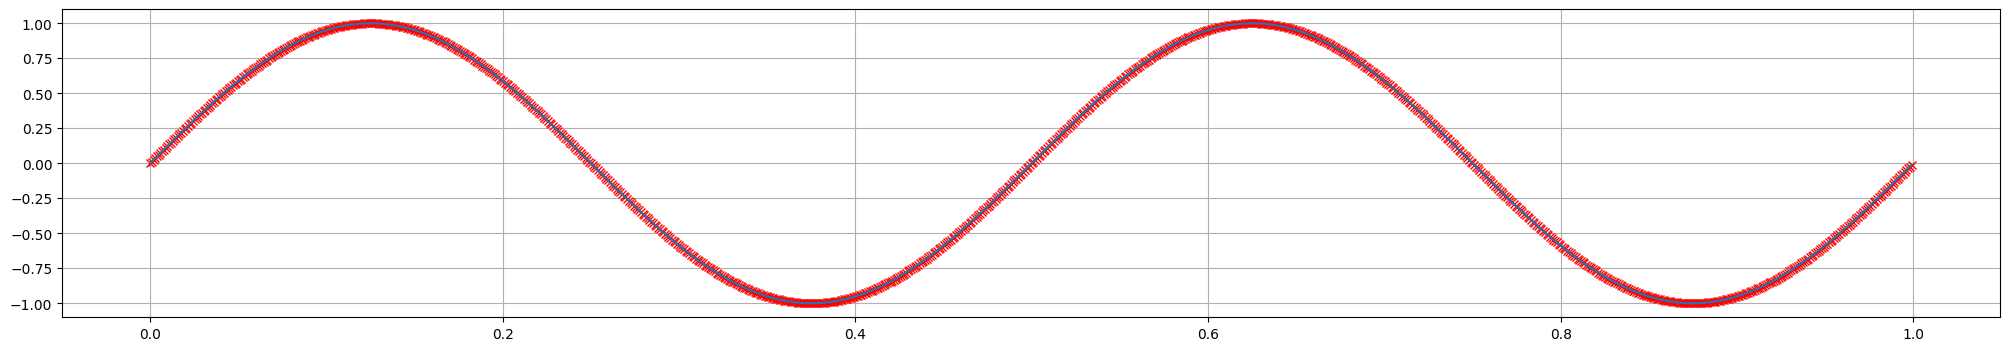

Vx[9] = 2.25


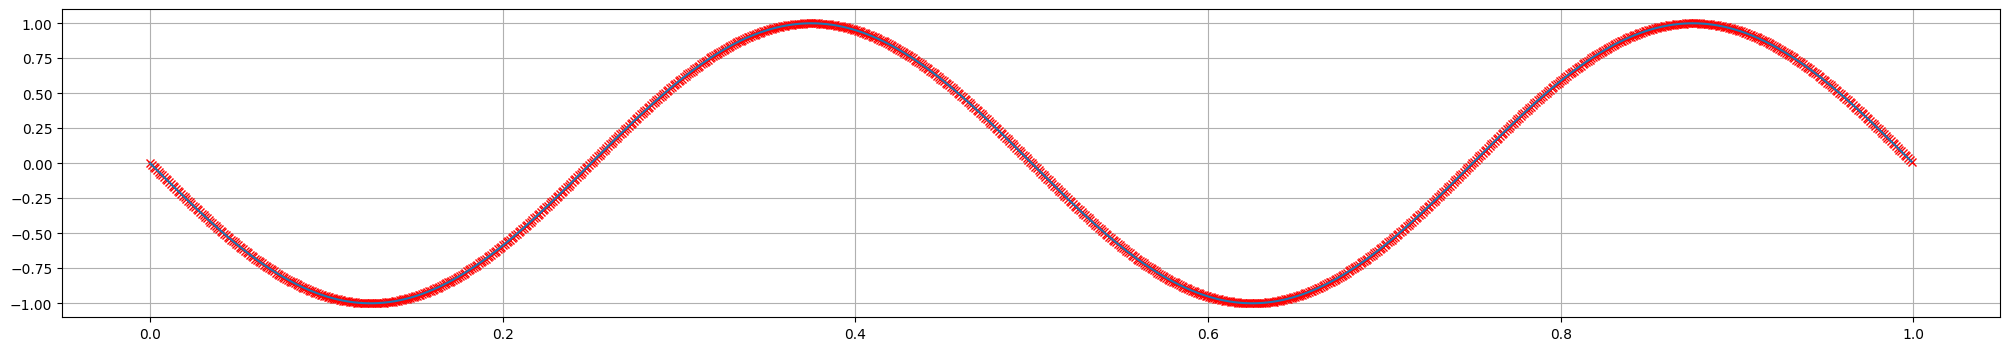

In [34]:
t = nIter*dt
x = np.arange(minX, maxX, step=dx)

# for iloc in range(len(df)):
for iloc in range(10):
    currV = minVx + iloc * dVx
    print(f"Vx[{iloc}] = {currV}")

    plt.figure(figsize=(25,4))
    y = df.iloc[iloc]
    plt.plot(x, y, '-rx') #plot numerical approximation
    plt.plot(x, np.sin((x - t*currV)*4*math.pi)) #plot the exact solution for this Vx
    plt.grid()
    plt.show()


# Error diag

Vx[0] = 0.0


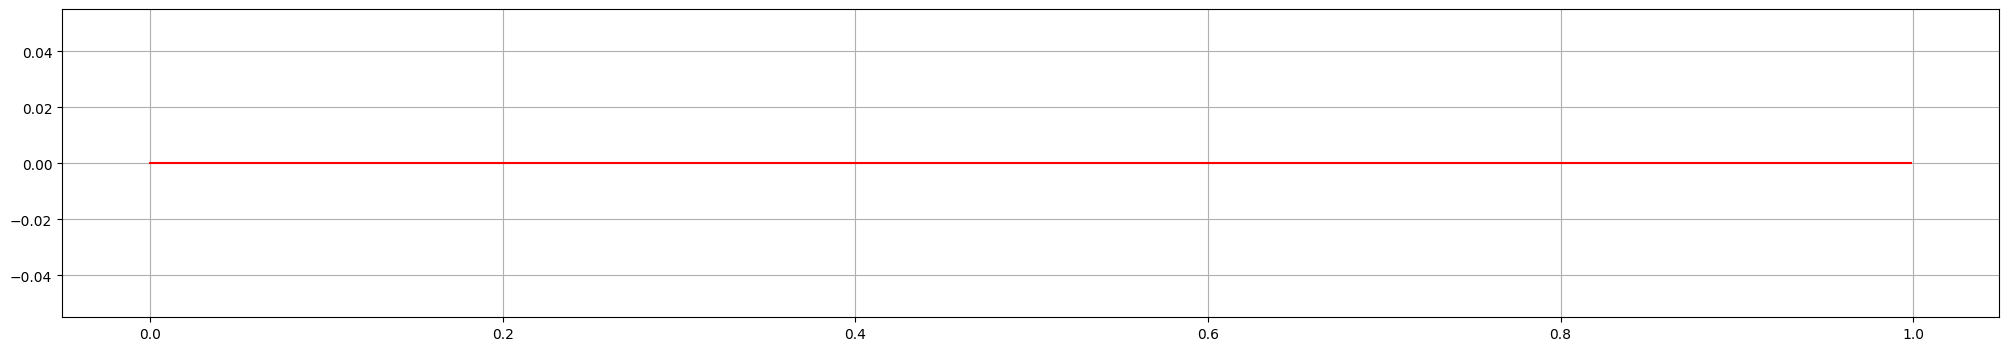

Vx[1] = 0.25


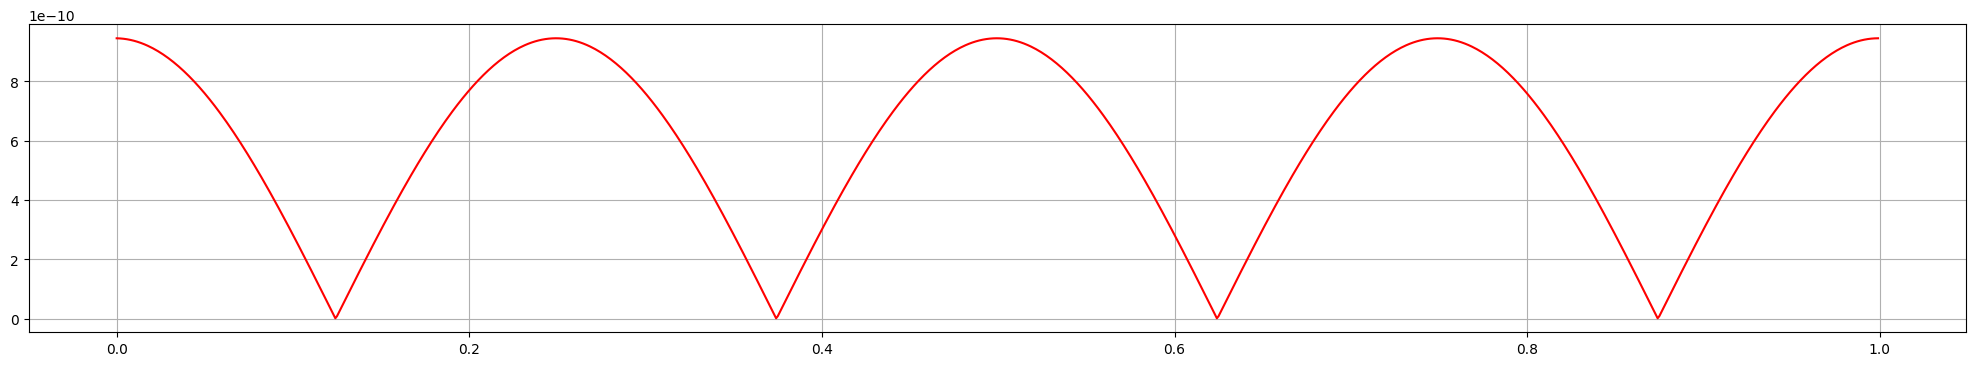

Vx[2] = 0.5


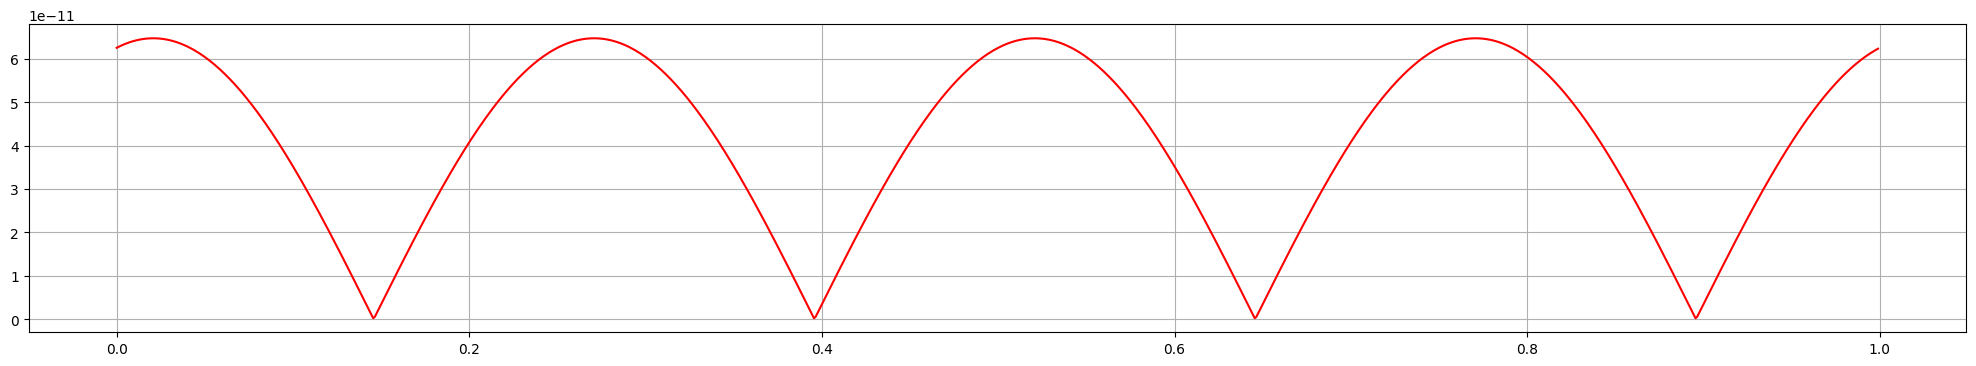

Vx[3] = 0.75


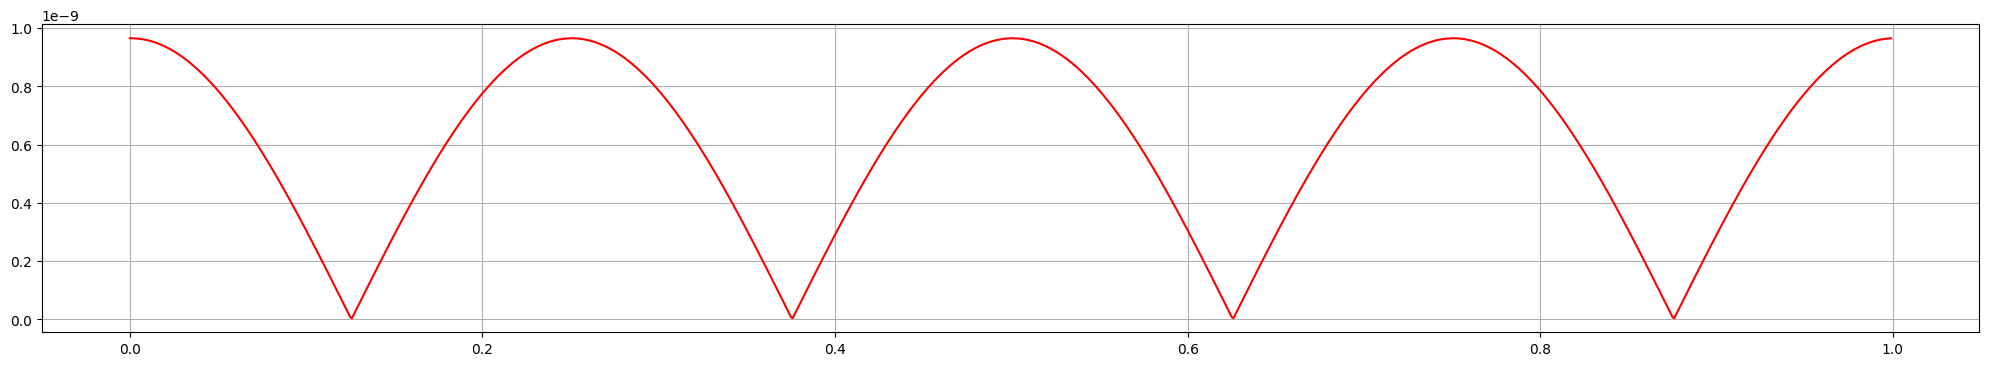

Vx[4] = 1.0


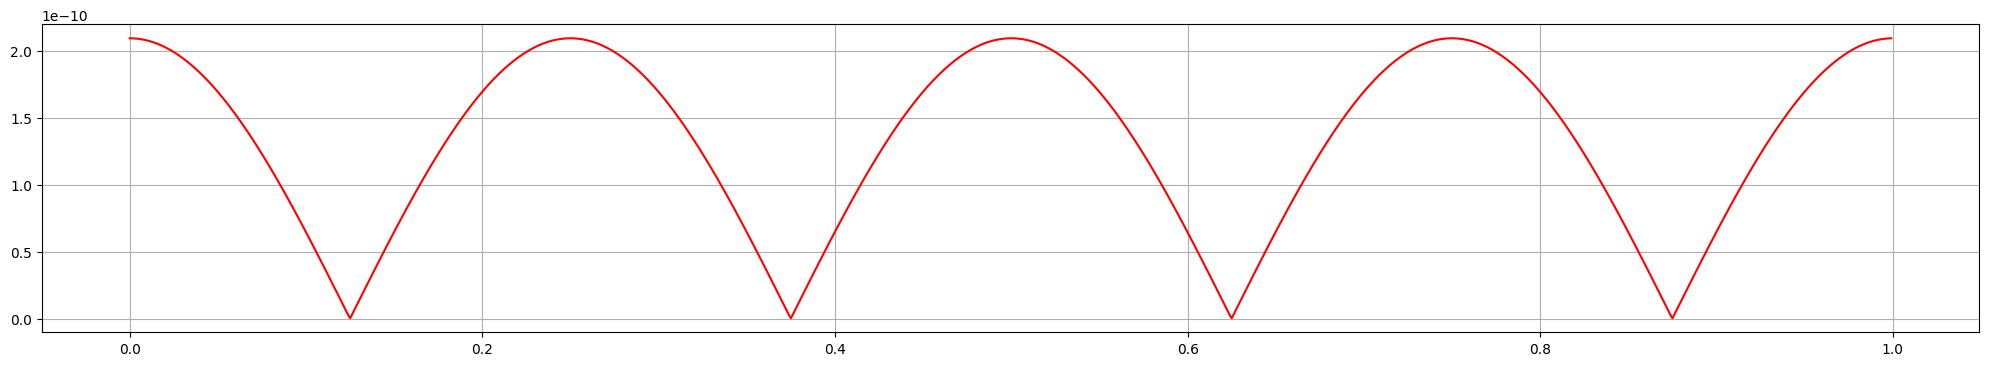

Vx[5] = 1.25


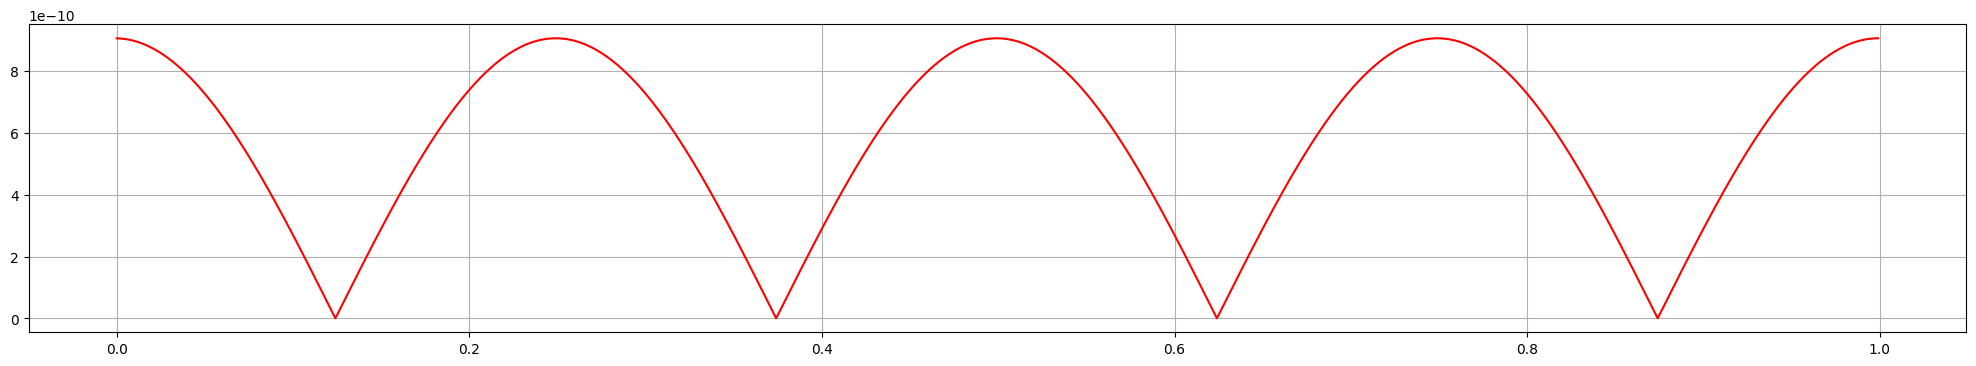

Vx[6] = 1.5


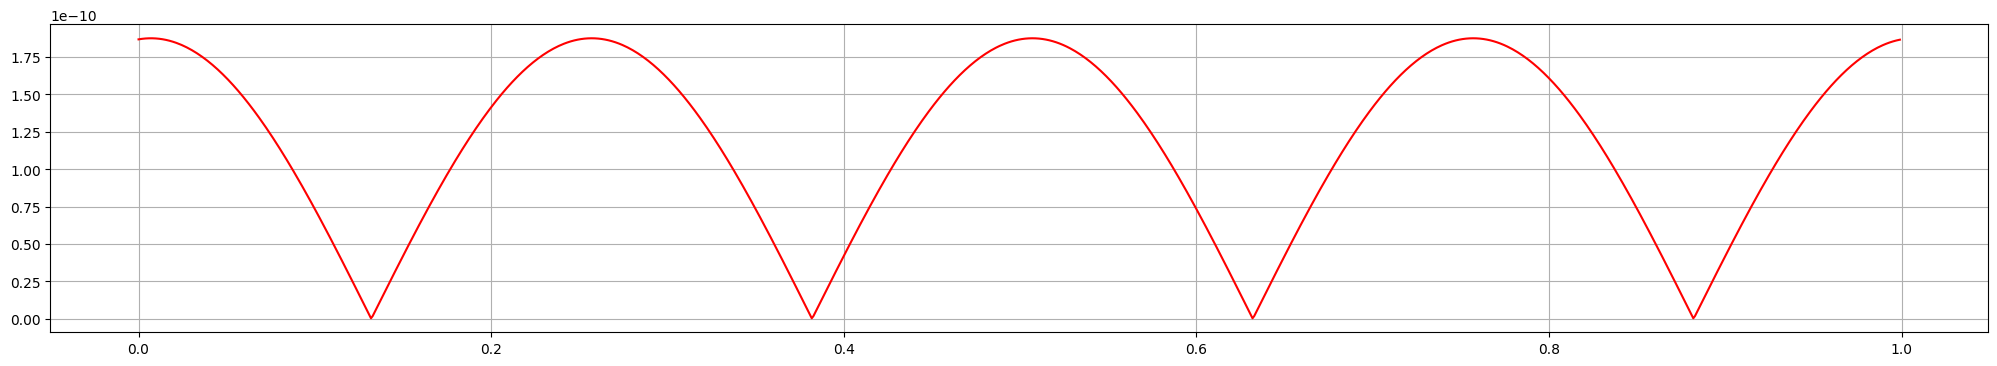

Vx[7] = 1.75


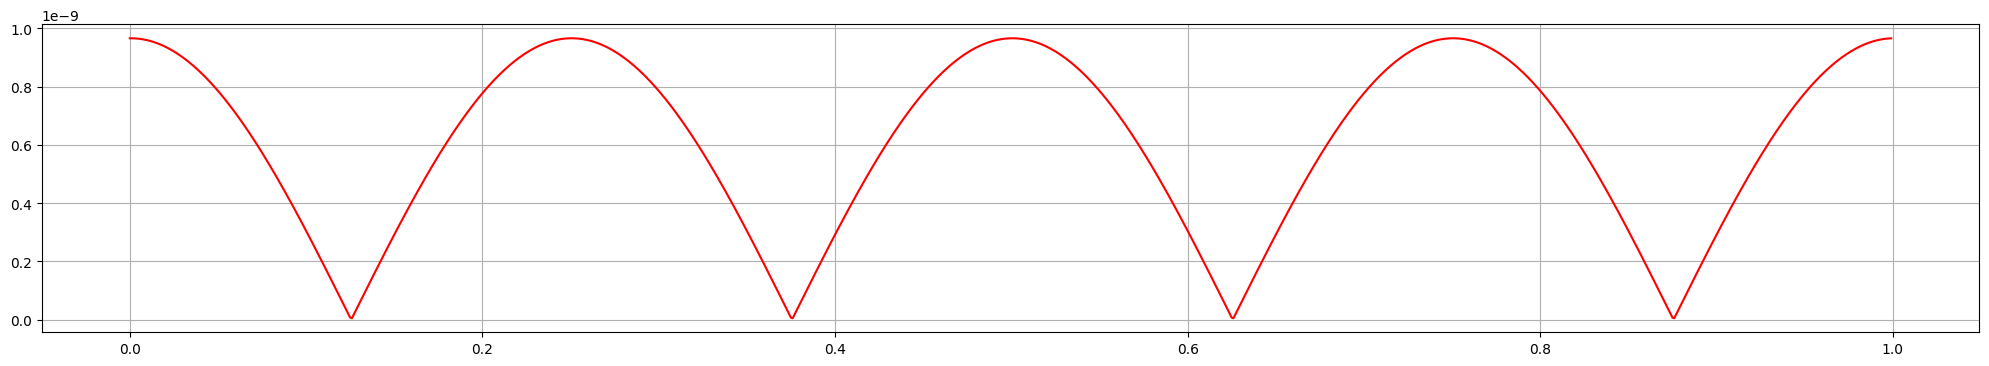

Vx[8] = 2.0


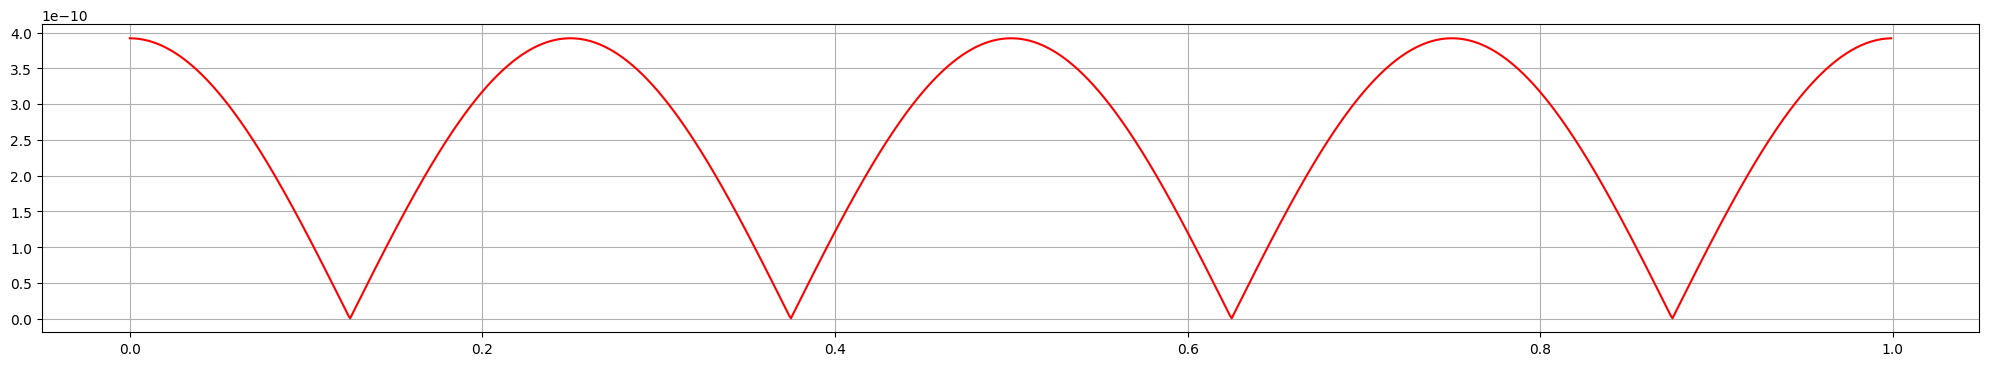

Vx[9] = 2.25


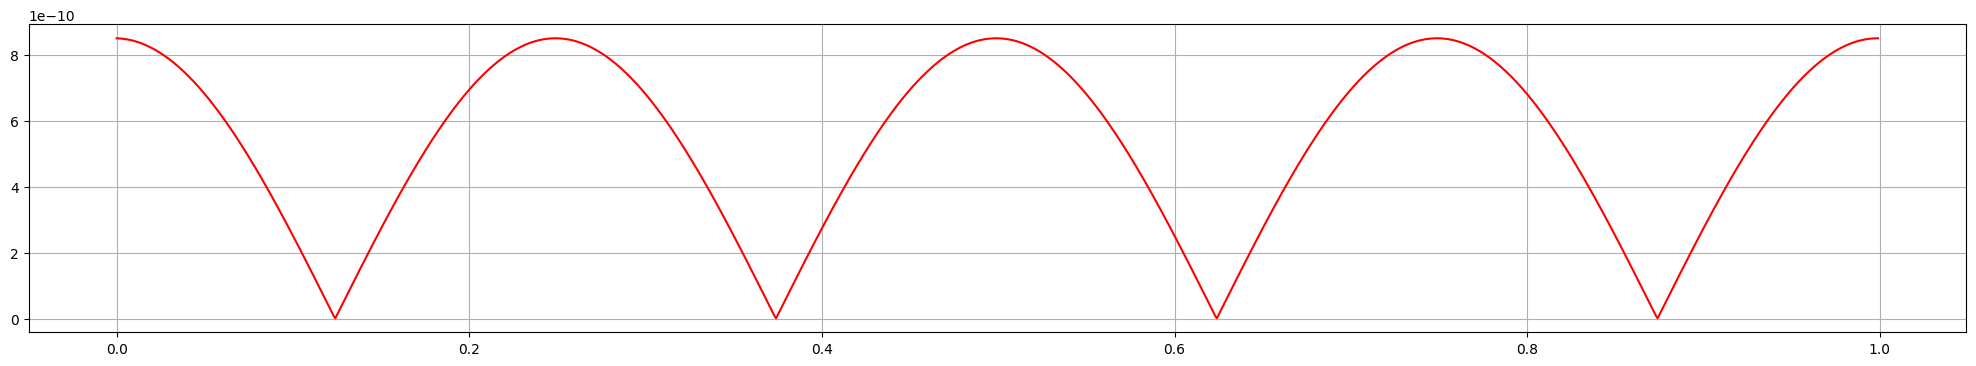

In [35]:
df_err = pd.read_csv("../build/src/error.log", sep=",", header=None)

t = nIter*dt
x = np.arange(minX, maxX, step=dx)

# for iloc in range(len(df_err)):
for iloc in range(10):
    currV = minVx + iloc * dVx
    print(f"Vx[{iloc}] = {currV}")

    plt.figure(figsize=(25,4))
    y = df_err.iloc[iloc]
    plt.plot(x, y, '-r')
    plt.grid()
    plt.show()

